<a href="https://colab.research.google.com/github/usagiyaha/Data-Projects/blob/main/FB%20vs%20Ins/FB_Ins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
The marketing team wants to publish a PR piece on Instagram Reels Vs. Facebook Reels.
Our goal is to help brands identify the best social media strategy for Reels:

*   Facebook first? Instagram first? Both simultaneously?
*   Is there a secret formula to create Reels that resonate?


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving master.csv to master.csv


In [ ]:
#df=pd.read_csv('master.csv', delimiter='，',low_memory=False)
df=pd.read_csv('master.csv')
print(df.info())

<ipython-input-4-f4e00fcf4f9a>:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('master.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151559 entries, 0 to 151558
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   profile_id          151559 non-null  int64  
 1   post_id             151559 non-null  object 
 2   post_link           151559 non-null  object 
 3   post_type           151559 non-null  object 
 4   created_time        151559 non-null  object 
 5   created_month       151559 non-null  int64  
 6   created_year        151559 non-null  int64  
 7   post_images         151473 non-null  object 
 8   comment_count       151559 non-null  int64  
 9   like_count          151511 non-null  float64
 10  total_interactions  151559 non-null  int64  
 11  message             150898 non-null  object 
 12  profile_about       150368 non-null  object 
 13  followed_by         144439 non-null  float64
 14  profile_name        151559 non-null  object 
 15  profile_username    151559 non-nul

In [ ]:
df

,profile_id,post_id,post_link,post_type,created_time,created_month,created_year,post_images,comment_count,like_count,...,message,profile_about,followed_by,profile_name,profile_username,profile_link,profie_tag_1,profie_tag_2,profie_tag_3,profile_iso_code
0,17841408823315577,17993462078353732,https://www.instagram.com/p/C4qWErtv2O8/,Carousel,2024-03-18 16:04:31,3,2024,['https://scontent-sea1-1.cdninstagram.com/v/t...,3,45.0,...,#LaRecetaPerfecta de una buena recuperación.​ ...,NaN,94984.0,Farmacias Guadalajara,farmaciasguadalajara,https://www.instagram.com/farmaciasguadalajara,brands,retail,beauty & drug stores,['MX']
1,17841452852774476,17995675085327193,https://www.instagram.com/reel/C4QQOnILqjp/,Reels,2024-03-08 12:53:58,3,2024,['https://scontent-sea1-1.cdninstagram.com/v/t...,0,26.0,...,Early Morning Training @chinedum_maduka,"50,000 square feet of fitness & fun! No Judgem...",2332.0,Crunch Madison,crunchmadison,https://www.instagram.com/crunchmadison,brands,services,wellness,['US']
2,17841400380345417,17872184583065319,https://www.instagram.com/reel/C5D-vgxMYYE/,Reels,2024-03-28 15:01:07,3,2024,['https://scontent-sea1-1.cdninstagram.com/v/t...,0,42.0,...,جددي إطلالتك بلون شعر جديد يناسب ملامحك الآن ب...,نسعى دائما لخدمة ضيوفنا بأفضل صورة ... زورونا ...,2175160.0,صيدلية النهدي Nahdi Pharmacy,nahdihope,https://www.instagram.com/nahdihope,brands,retail,beauty & drug stores,['SA']
3,17841400189757765,17893912436922474,https://www.instagram.com/reel/C5BnyI3Jii2/,Reels,2024-03-27 17:02:07,3,2024,['https://scontent-sea1-1.cdninstagram.com/v/t...,0,189.0,...,Chcesz przetestować bestsellerowe produkty i h...,Razem tworzymy piękno.,308390.0,Sephora Polska,sephorapolska,https://www.instagram.com/sephorapolska,brands,retail,beauty & drug stores,['PL']
4,17841411688484953,17891057453995540,https://www.instagram.com/reel/C42kWmCKmTV/,Reels,2024-03-23 10:00:44,3,2024,['https://scontent-sea1-1.cdninstagram.com/v/t...,0,29.0,...,"👷‍♀️La conciliación, la importancia de contar ...","#SyngentaES, una empresa líder en agrotecnolog...",7893.0,Syngenta España,syngenta.es,https://www.instagram.com/syngenta.es,brands,industrial,No Tag,['ES']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151554,361954347151564,361954347151564_819751050183458,https://www.facebook.com/reel/970157217951197/,Reels,2024-04-09 04:02:51,4,2024,['https://scontent-sea1-1.xx.fbcdn.net/v/t15.5...,537,1011.0,...,Geng kerja masa Raya hadir! 🙋🥲 Kalau anda ada...,Tenaga Nasional Berhad official Facebook page....,473636.0,TNB CareLine,TNBCareline,https://www.facebook.com/TNBCareline,brands,industrial,No Tag,['MY']
151555,361954347151564,361954347151564_819883550170208,https://www.facebook.com/reel/398032529821742/,Reels,2024-04-09 10:00:40,4,2024,['https://scontent-sea1-1.xx.fbcdn.net/v/t15.5...,380,104.0,...,Tak lama lagi kita dah nak raya dah 🤩 Macam ma...,Tenaga Nasional Berhad official Facebook page....,473636.0,TNB CareLine,TNBCareline,https://www.facebook.com/TNBCareline,brands,industrial,No Tag,['MY']
151556,361954347151564,361954347151564_830302332461663,https://www.facebook.com/636399881851910/posts...,Reels,2024-04-26 04:37:47,4,2024,['https://scontent-sea1-1.xx.fbcdn.net/v/t15.5...,28,143.0,...,"Bila semua suis dah tutup dekat rumah sendiri,...",Tenaga Nasional Berhad official Facebook page....,473636.0,TNB CareLine,TNBCareline,https://www.facebook.com/TNBCareline,brands,industrial,No Tag,['MY']
151557,361954347151564,361954347151564_830303742461522,https://www.facebook.com/636399881851910/posts...,Reels,2024-04-26 04:41:33,4,2024,['https://scontent-sea1-1.xx.fbcdn.net/v/t51.2...,0,10.0,...,"Bila semua suis dah tutup dekat rumah sendiri,...",Tenaga Nasional Berhad official Facebook page....,473636.0,TNB CareLine,TNBCareline,https://www.facebook.com/TNBCareline,brands,industrial,No Tag,['MY']


In [ ]:
# Subset with only reels post
reels_post = df[df['post_type']=='Reels']
print(reels_post.shape)

(100974, 21)


# Data Preparation

In [ ]:
# reels_post.duplicated().sum()
# Missing value
total = reels_post.shape[0]
reels_post.isna().sum()/total

profile_id            0.000000
post_id               0.000000
post_link             0.000000
post_type             0.000000
created_time          0.000000
created_month         0.000000
created_year          0.000000
post_images           0.000852
comment_count         0.000000
like_count            0.000168
total_interactions    0.000000
message               0.005496
profile_about         0.010042
followed_by           0.062462
profile_name          0.000000
profile_username      0.000000
profile_link          0.000000
profie_tag_1          0.000000
profie_tag_2          0.000000
profie_tag_3          0.000000
profile_iso_code      0.000000
dtype: float64

In [ ]:
reels_post=reels_post.dropna()

In [ ]:
# Fill NA in "followed_by" with the closest available value in each profile
#reels_post = reels_post.sort_values(by=['profile_name', 'date'])
# reels_post['followed_by'] =
# reels_post.groupby('profile_name')['followed_by'].ffill()

In [ ]:
reels_post.shape

(93357, 21)

In [ ]:
# Post time
reels_post['created_time'] = pd.to_datetime(reels_post['created_time'])
reels_post['date'] = reels_post['created_time'].dt.date
reels_post['weekday'] = reels_post['created_time'].dt.day_name()
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
reels_post['weekday'] = pd.Categorical(reels_post['weekday'], categories=cats, ordered=True)
reels_post['post_hour'] = reels_post['created_time'].dt.hour

In [ ]:
# Create variable that indicate the platform
def categorize_link(url):
    if 'instagram.com' in url:
        return 'Instagram'
    else:
        return 'Facebook'

reels_post['platform'] = reels_post['post_link'].apply(categorize_link)
reels_post['platform'].value_counts()

platform
Instagram    82012
Facebook     11345
Name: count, dtype: int64

In [ ]:
# Calculate engagement rate for each post
reels_post['engagement_rate']=(reels_post['total_interactions'])/reels_post['followed_by']

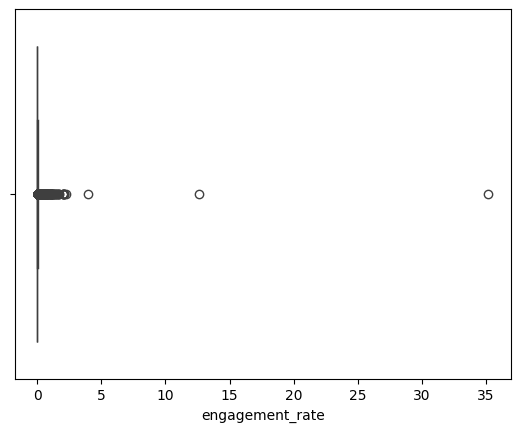

In [ ]:
sns.boxplot(x=reels_post['engagement_rate'])
plt.show()

In [ ]:
reels_post=reels_post.reset_index()
z1 = np.abs(stats.zscore(reels_post['engagement_rate']))
outlier_indices = np.where(z1 > 3)[0]
reels_post = reels_post.drop(outlier_indices)
reels_post.shape

(93265, 27)

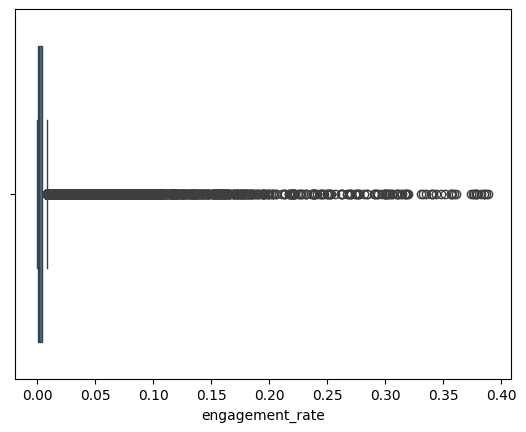

In [ ]:
sns.boxplot(x=reels_post['engagement_rate'])
plt.show()

# EDA

In [ ]:
reels_post.describe()

,index,profile_id,created_time,created_month,created_year,comment_count,like_count,total_interactions,followed_by,post_hour,engagement_rate
count,93265.000000,9.326500e+04,93265,93265.000000,93265.0,93265.000000,9.326500e+04,9.326500e+04,9.326500e+04,93265.000000,93265.000000
mean,74807.485863,1.571655e+16,2024-04-05 13:48:37.701206272,3.702354,2024.0,36.631126,7.853070e+02,8.231814e+02,6.333801e+05,13.261449,0.004523
min,1.000000,6.422691e+09,2024-03-01 00:00:07,3.000000,2024.0,0.000000,0.000000e+00,0.000000e+00,1.040000e+02,0.000000,0.000000
25%,37727.000000,1.784140e+16,2024-03-18 20:17:37,3.000000,2024.0,0.000000,1.900000e+01,2.000000e+01,1.289400e+04,9.000000,0.000391
50%,74681.000000,1.784140e+16,2024-04-05 03:31:11,4.000000,2024.0,2.000000,7.000000e+01,7.500000e+01,7.324300e+04,14.000000,0.001267
75%,111536.000000,1.784141e+16,2024-04-23 15:00:43,4.000000,2024.0,10.000000,2.700000e+02,2.880000e+02,3.415160e+05,17.000000,0.003591
max,151558.000000,1.784146e+16,2024-05-11 23:26:56,5.000000,2024.0,39131.000000,4.862406e+06,4.881141e+06,5.999352e+07,23.000000,0.388910
std,42827.997545,5.714439e+15,NaN,0.706009,0.0,458.363749,1.704396e+04,1.714194e+04,2.799908e+06,5.546166,0.015106


In [ ]:
# Group by platform and calculate mean values
platform_summary = reels_post.groupby('platform')[['comment_count','like_count','total_interactions']].mean().reset_index()

print(platform_summary)

    platform  comment_count  like_count  total_interactions
0   Facebook      11.448443  205.541501          227.218135
1  Instagram      40.115846  865.533529          905.649375


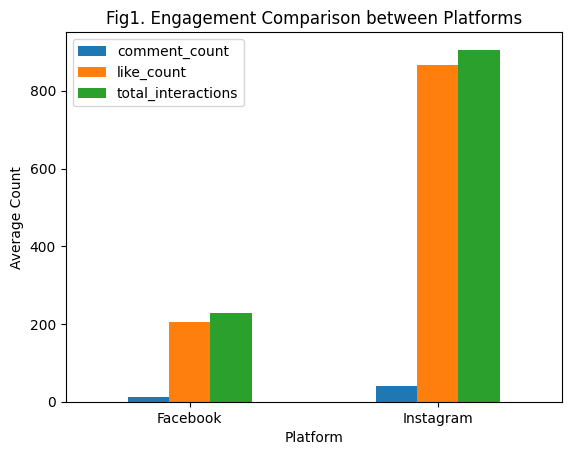

In [ ]:
# Plot platform summary
platform_summary.set_index('platform').plot(kind='bar')
plt.title('Fig1. Engagement Comparison between Platforms')
plt.xlabel('Platform')
plt.ylabel('Average Count')
plt.xticks(rotation=360)
plt.show()

In [ ]:
# Group by platform and calculate average engagement rate
engagement_summary = reels_post.groupby('platform')['engagement_rate'].mean().reset_index()

print(engagement_summary)


    platform  engagement_rate
0   Facebook         0.001736
1  Instagram         0.004908


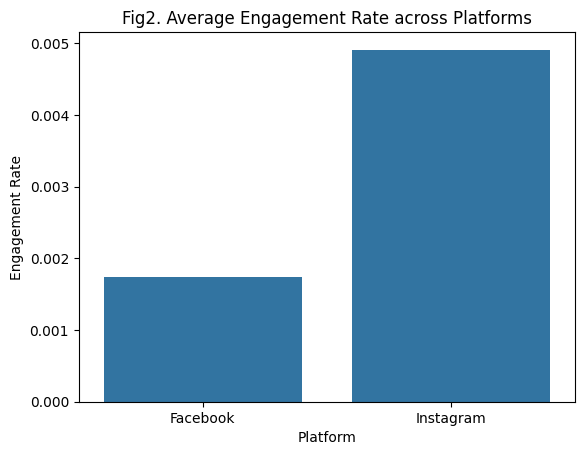

In [ ]:
# Plot average engagement rate per platform
sns.barplot(x='platform', y='engagement_rate', data=engagement_summary)
plt.title('Fig2. Average Engagement Rate across Platforms')
plt.xlabel('Platform')
plt.ylabel('Engagement Rate')
plt.show()

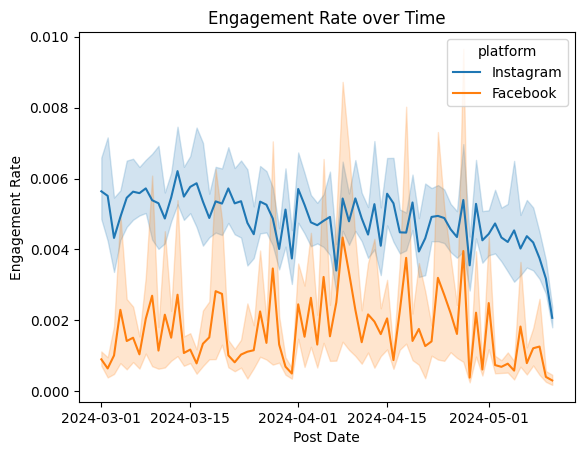

In [ ]:
sns.lineplot(data=reels_post, x='date', y='engagement_rate', hue="platform")
plt.title('Engagement Rate over Time')
plt.xlabel('Post Date')
plt.ylabel('Engagement Rate')
plt.show()

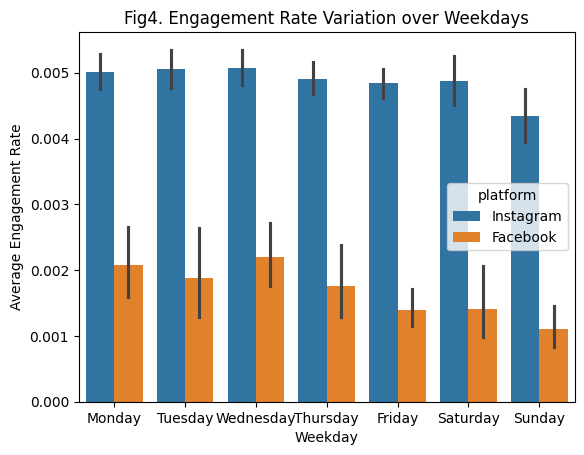

In [ ]:
sns.barplot(data=reels_post, x='weekday', y='engagement_rate', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], hue='platform')
plt.title('Fig4. Engagement Rate Variation over Weekdays')
plt.xlabel('Weekday')
plt.ylabel('Average Engagement Rate')
plt.show()

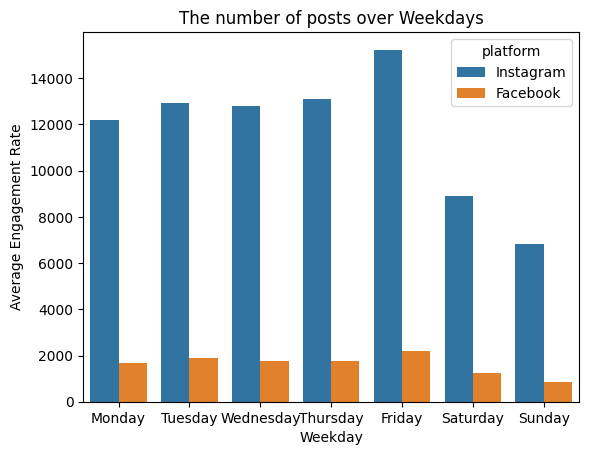

In [ ]:
sns.countplot(data=reels_post, x='weekday', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], hue='platform')
plt.title('The number of posts over Weekdays')
plt.xlabel('Weekday')
plt.ylabel('Average Engagement Rate')
plt.show()

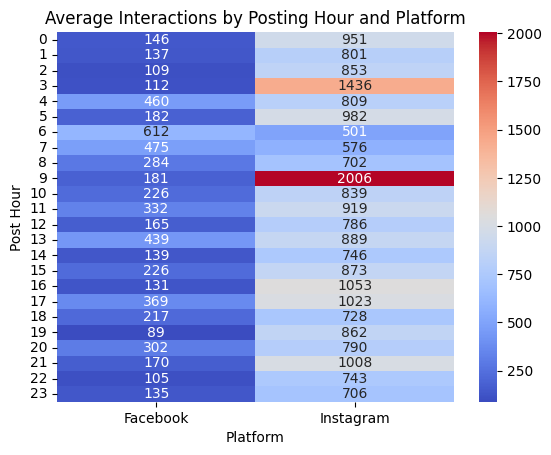

In [ ]:
# Which post time is better?
# Total interactions by time
peak_times = reels_post.groupby(['platform', 'post_hour'])['total_interactions'].mean().reset_index()
pivot_table = peak_times.pivot(index='post_hour',columns='platform', values='total_interactions')
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".0f")
plt.title('Average Interactions by Posting Hour and Platform')
plt.xlabel('Platform')
plt.ylabel('Post Hour')
plt.show()


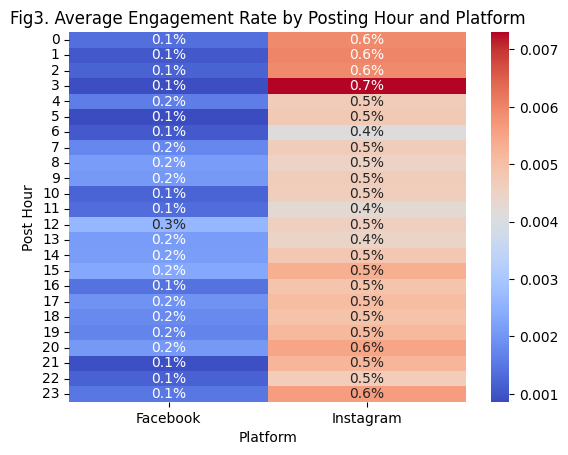

In [ ]:
# Engagement rate by time
peak_times2 = reels_post.groupby(['platform', 'post_hour'])['engagement_rate'].mean().reset_index()
pivot_table2 = peak_times2.pivot(index='post_hour',columns='platform', values='engagement_rate')
sns.heatmap(pivot_table2, cmap='coolwarm', annot=True, fmt = '.1%')
plt.title('Fig3. Average Engagement Rate by Posting Hour and Platform')
plt.xlabel('Platform')
plt.ylabel('Post Hour')
plt.show()

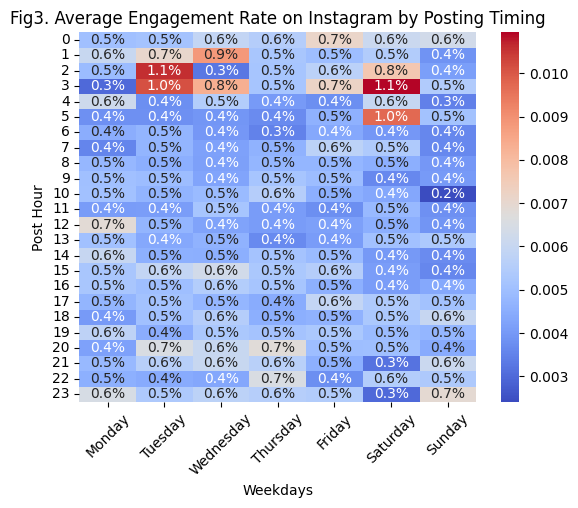

In [ ]:
# Instagram engagement rate by weekdays and time
instagram = reels_post[reels_post['platform']=='Instagram']
peak_times3 = instagram.groupby(['weekday', 'post_hour'])['engagement_rate'].mean().reset_index()
peak_times3 = peak_times3.sort_values('weekday')
pivot_table3 = peak_times3.pivot(index='post_hour',columns='weekday', values='engagement_rate')
sns.heatmap(pivot_table3, cmap='coolwarm', annot=True, fmt = '.1%')
plt.title('Fig3. Average Engagement Rate on Instagram by Posting Timing')
plt.xlabel('Weekdays')
plt.ylabel('Post Hour')
plt.xticks(rotation=45)
plt.show()

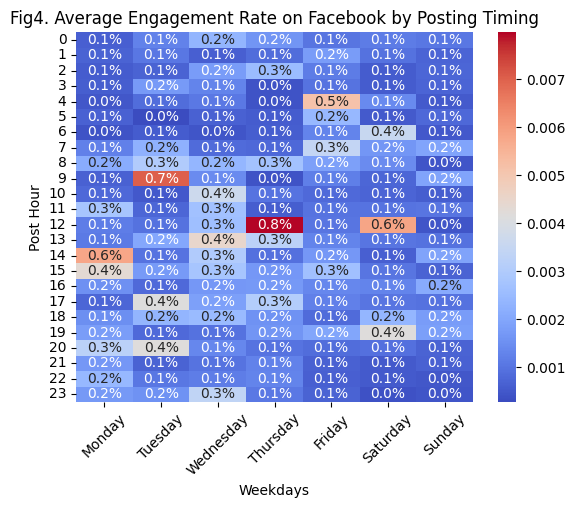

In [ ]:
# Instagram engagement rate by weekdays and time
facebook = reels_post[reels_post['platform']=='Facebook']
peak_times4 = facebook.groupby(['weekday', 'post_hour'])['engagement_rate'].mean().reset_index()
peak_times4 = peak_times4.sort_values('weekday')
pivot_table4 = peak_times4.pivot(index='post_hour',columns='weekday', values='engagement_rate')
sns.heatmap(pivot_table4, cmap='coolwarm', annot=True, fmt = '.1%')
plt.title('Fig4. Average Engagement Rate on Facebook by Posting Timing')
plt.xlabel('Weekdays')
plt.ylabel('Post Hour')
plt.xticks(rotation=45)
plt.show()

In [ ]:
industry_group = reels_post.groupby(['profie_tag_2','platform'])['engagement_rate'].mean().reset_index()
industry_platform = industry_group.pivot(index='profie_tag_2',columns='platform', values='engagement_rate')
compare_index =np.where(industry_platform['Facebook']>industry_platform['Instagram'])
industry_platform.iloc[compare_index]

platform,Facebook,Instagram
profie_tag_2,,
conglomerate,0.013995,0.003359
electronics,0.007218,0.003712


# Statistical Analysis

In [ ]:
from scipy.stats import ttest_ind

# Hypothesis test
facebook = reels_post[reels_post['platform'] == 'Facebook']['engagement_rate']
instagram = reels_post[reels_post['platform'] == 'Instagram']['engagement_rate']

t_stat, p_val = ttest_ind(facebook, instagram, equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_val}")

if p_val < 0.05:
    print("There is a statistically significant difference between the engagement rates of Facebook and Instagram.")
else:
    print("There is no statistically significant difference between the engagement rates of Facebook and Instagram.")


T-statistic: -27.696655586793238, P-value: 1.661559550335462e-165
There is a statistically significant difference between the engagement rates of Facebook and Instagram.


In [ ]:
import statsmodels.api as sm
# Regression analysis
reels_post['post_hour'] = reels_post['post_hour'].astype(str)
#categorical_features = ['profie_tag_1', 'profie_tag_2', 'profie_tag_3','profile_iso_code','weekday', 'post_hour', 'platform']
categorical_features = ['weekday', 'post_hour', 'platform']
x_cat = pd.get_dummies(reels_post[categorical_features], drop_first=True)
x = pd.concat([reels_post['followed_by'], x_cat], axis=1)
bool_cols = x.select_dtypes(include='bool').columns
x[bool_cols] = x[bool_cols].astype(int)
y = reels_post['engagement_rate']
x = sm.add_constant(x)

# Fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:        engagement_rate   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     24.18
Date:                Tue, 28 May 2024   Prob (F-statistic):          4.27e-137
Time:                        13:09:24   Log-Likelihood:             2.5907e+05
No. Observations:               93265   AIC:                        -5.181e+05
Df Residuals:                   93233   BIC:                        -5.178e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0027      0

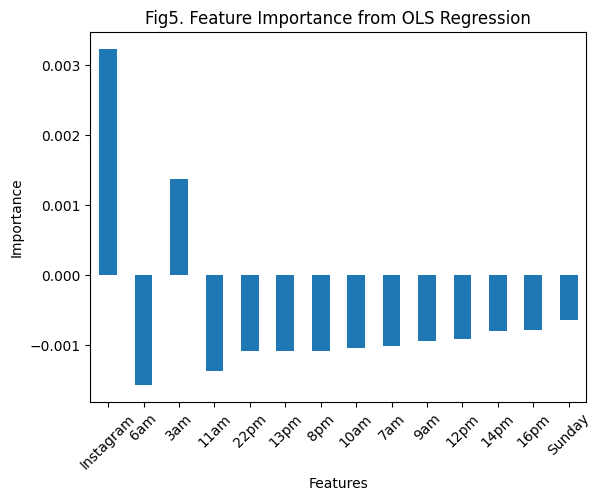

In [ ]:
# Check feature importance
coefficients = model.params
p_values = model.pvalues
coefficients = coefficients.drop('const')
p_values = p_values.drop('const')
significant_features = p_values[p_values <= 0.05].index
# Calculate absolute values of coefficients for significant features
feature_importance = coefficients[significant_features].abs()
sorted_importance = feature_importance.sort_values(ascending=False).nlargest(14)
features = sorted_importance.reset_index().iloc[:,0]
ax = plt.subplot()
coefficients[features].plot(kind='bar')
plt.title('Fig5. Feature Importance from OLS Regression')
plt.xlabel('Features')
plt.ylabel('Importance')
ax.set_xticklabels(["Instagram","6am","3am","11am","22pm","13pm","8pm","10am","7am","9am","12pm","14pm","16pm","Sunday"])
plt.xticks(rotation=45)
plt.show()

# Conclusion
Based on the analysis, the recommendation is to prioritize PR efforts on Instagram Reels due to its higher engagement rates on average. Furthermore, the posting time is important for a successful post. I reccomend to post at Tuesday/Saturday 2-3am on Instagram, and post at Thursday 12pm on Facebook.